## Nivell 1


- Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

## SQL commands on Postresql database

### >>> Create table "clients" on database

DROP TABLE IF EXISTS "clients" CASCADE;
CREATE TABLE IF NOT EXISTS public."clients"
(
    "idclient" integer NOT NULL,
    "nif" varchar(9) NOT NULL,
    "nom" varchar(30) NOT NULL,
    "primercognom" varchar(30) NOT NULL,
    "segoncognom" varchar(30) NOT NULL,
    "mail" varchar(50) NOT NULL,
    "telefon1" varchar(9) NOT NULL,
    "telefon2" varchar(9) NOT NULL,
    "adresa" varchar(50) NOT NULL,
    "cp" varchar(5) NOT NULL,
    "municipi" varchar(30) NOT NULL,
    PRIMARY KEY ("idclient")
)
WITH (
    OIDS = FALSE
);

### >>> Create table "establiments" on database

DROP TABLE IF EXISTS "establiments" CASCADE;
CREATE TABLE IF NOT EXISTS public."establiments"
(
    "idestabliment" integer NOT NULL,
    "nom" varchar(30) NOT NULL,
    "descripcio" varchar(150) NOT NULL,
    "mail" varchar(50) NOT NULL,
	"telefon1" varchar(9) NOT NULL,
    "adresa" varchar(100) NOT NULL,
	"cp" varchar(5) NOT NULL,
    "municipi" varchar(50) NOT NULL,
    "geolocalitzacio" varchar(30) NOT NULL,
    "superficie" numeric(10) NOT NULL,
    "plantes" integer NOT NULL,
    PRIMARY KEY ("idestabliment")
)
WITH (
    OIDS = FALSE
);


### >>> Create table "productes" on database

DROP TABLE IF EXISTS "compres" CASCADE;
CREATE TABLE IF NOT EXISTS public."compres"
(
    "idcompra" integer NOT NULL,
    "idproducte" integer NOT NULL,
    "idclient" integer NOT NULL,
    "idestabliment" integer NOT NULL,
    "idtreballador" integer NOT NULL,
    "datavenda" date NOT NULL,
    PRIMARY KEY ("idcompra")
)
WITH (
    OIDS = FALSE
);

### >>> Create table "treballadors" on database

DROP TABLE IF EXISTS "productes" CASCADE;
CREATE TABLE IF NOT EXISTS public."productes"
(
    "idproducte" integer NOT NULL,
    "codi" varchar(20) NOT NULL,
    "descripcio" varchar(150) NOT NULL,
    "preu" numeric(10) NOT NULL,
    "stock" varchar(5) NOT NULL,
    "datacompra" date NOT NULL,
    "idtipus" integer NOT NULL,
    "proveidor" varchar(50) NOT NULL,
    "model" varchar(50) NOT NULL,
    PRIMARY KEY ("idproducte")
)
WITH (
    OIDS = FALSE
);


### >>> Create table "tipus_producte" on database

DROP TABLE IF EXISTS "treballadors" CASCADE;
CREATE TABLE IF NOT EXISTS public."treballadors"
(
    "idtreballador" integer NOT NULL,
    "nif" varchar(9) NOT NULL,
    "nom" varchar(30) NOT NULL,
    "primercognom" varchar(30) NOT NULL,
    "segoncognom" varchar(30) NOT NULL,
    "telefon1" varchar(9) NOT NULL,
    "telefon2" varchar(9) NOT NULL,
    "mail" varchar(50) NOT NULL,
    "categoria" varchar(20) NOT NULL,
    "salari" numeric(10) NOT NULL,
    "adresa" varchar(50) NOT NULL,
    "cp" integer NOT NULL,
    "municipi" varchar(30) NOT NULL,
    "idestabliment" integer NOT NULL,
    PRIMARY KEY ("idtreballador")
)
WITH (
    OIDS = FALSE
);

### >>> Create table "compres" on database

DROP TABLE IF EXISTS "tipus_producte" CASCADE;
CREATE TABLE IF NOT EXISTS public."tipus_producte"
(
    "idtipus" integer NOT NULL,
    "codi" varchar(30) NOT NULL,
    "descripcio" varchar(150) NOT NULL,
    "iva" numeric(5) NOT NULL,
    PRIMARY KEY ("idtipus")
)
WITH (
    OIDS = FALSE
);

In [1]:
#!pip install psycopg2
import psycopg2
import pandas as pd
from IPython import display  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create connection to the database
connection = psycopg2.connect(host="localhost",database="curs_datascience",user="postgres",password="postgres")
#print(connection)
cursor = connection.cursor()

In [3]:
#Show all tables on database created before
cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public' ORDER BY table_name;")
connection.commit()
pgresult = cursor.fetchall()
for table in pgresult: print(table)

('clients',)
('compres',)
('establiments',)
('productes',)
('tipus_producte',)
('treballadors',)


In [4]:
# Table "CLIENTS" - Insert records 
sql = 'INSERT INTO "clients" ("idclient", "nif", "nom", "primercognom", "segoncognom", "mail", "telefon1", "telefon2", "adresa", "cp", "municipi") VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'
values = [("1", "67749524T", "Antoni", "Rivas", "Chapon", "antonirivas@gmail.com", "627542716", "671864733", "Carrer Virgina, 1 2on 3a", "25009", "Lleida"),
("2", "53489761R", "Alba", "Lahorta", "Granya", "albalahorta@gmail.com", "672715969", "691512314", "Carrer Virgina, 1 2on 3a", "25010", "Lleida"),
("3", "91768758S", "Piere", "Duchamps", "Allez", "piereduchamps@gmail.com", "628616293", "687183836", "Plaça del Pagesos, 1 3e 4a", "25057", "Lleida"),
("4", "55737249E", "Akira", "Hito", "Shong", "akirahito@gmail.com", "697583849", "674355399", "Carrer Major, 12 2on 1a", "25281", "Alpicat"),
("5", "74771564H", "Oscar", "Farruchi", "Mathew", "oscarfarruchi@gmail.com", "618769257", "653526474", "Carrer Llitera, s/n 3er 2a", "25193", "Alfarràs"),
("6", "43788434U", "Montse", "Abeto", "Robles", "montseabeto@gmail.com", "627522127", "669552963", "Carrer Descartes, 20 4rt 4a", "25024", "Lleida"),
("7", "95896627J", "David", "Renuevo", "Dobles", "davidrenuevo@gmail.com", "643962587", "698278869", "Carrer Riemman, 34 5e 3a", "25074", "Lleida"),
("8", "79428422K", "Merche", "Marcia", "Navas", "merchemarcia@gmail.com", "641482557", "678551362", "Carrer Roger de Balanço, s/n baixos", "25045", "Lleida"),
("9", "57163657L", "Floren", "Perez", "Montés", "florenperez@gmail.com", "698263197", "653488194", "Carrer Kandinsky, 8, 1er 1a", "25168", "Torrefarrera"),
("10", "29121863Z", "Judith", "Gracia", "Narvona", "judithgracia@gmail.com", "674819233", "614678983", "Carrer sense nom, 2 1er 1a", "25186", "Alcarras"),
("11", "32225188X", "Maximo", "Wellintong", "Hill", "maximowellintong@gmail.com", "656299539", "615891574", "Carrer del Sol, 14 2on 2a", "25265", "Alcarras"),
("12", "13372872C", "Manel", "Garret", "Sibone", "manelgarret@gmail.com", "674126717", "696143839", "Carrer Univers, 3", "25216", "Benavent")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")



12 rows correctly inserted


In [5]:
cursor.execute('SELECT * FROM "clients"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, '67749524T', 'Antoni', 'Rivas', 'Chapon', 'antonirivas@gmail.com', '627542716', '671864733', 'Carrer Virgina, 1 2on 3a', '25009', 'Lleida')
(2, '53489761R', 'Alba', 'Lahorta', 'Granya', 'albalahorta@gmail.com', '672715969', '691512314', 'Carrer Virgina, 1 2on 3a', '25010', 'Lleida')
(3, '91768758S', 'Piere', 'Duchamps', 'Allez', 'piereduchamps@gmail.com', '628616293', '687183836', 'Plaça del Pagesos, 1 3e 4a', '25057', 'Lleida')
(4, '55737249E', 'Akira', 'Hito', 'Shong', 'akirahito@gmail.com', '697583849', '674355399', 'Carrer Major, 12 2on 1a', '25281', 'Alpicat')
(5, '74771564H', 'Oscar', 'Farruchi', 'Mathew', 'oscarfarruchi@gmail.com', '618769257', '653526474', 'Carrer Llitera, s/n 3er 2a', '25193', 'Alfarràs')
(6, '43788434U', 'Montse', 'Abeto', 'Robles', 'montseabeto@gmail.com', '627522127', '669552963', 'Carrer Descartes, 20 4rt 4a', '25024', 'Lleida')
(7, '95896627J', 'David', 'Renuevo', 'Dobles', 'davidrenuevo@gmail.com', '643962587', '698278869', 'Carrer Riemman, 34 5e 3a'

In [6]:
# Table "ESTABLIMENTS" - Insert records 
sql = 'INSERT INTO "establiments" ("idestabliment", "nom", "descripcio", "mail", "telefon1", "adresa", "cp", "municipi", "geolocalitzacio", "superficie", "plantes") VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'
values = [("1", "Informatica Riba - Eix", "Establiment ubicat en ple Eix comercial de Lleida", "eixcomercial@informaticariba.com", "627545812", "Carrer Major, 14", "25001", "Lleida", "41.613291, 0.624505", "60", "2"),
("2", "Informatica Riba - Pardinyes", "Establiment ubicat en el barri de Pardinyes de Lleida", "pardinyes@informaticariba.com", "674356717", "Carrer Corregidor Escofet, 35", "25003", "Lleida", "41.623387, 0.637939", "45", "1")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")

2 rows correctly inserted


In [7]:
cursor.execute('SELECT * FROM "establiments"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, 'Informatica Riba - Eix', 'Establiment ubicat en ple Eix comercial de Lleida', 'eixcomercial@informaticariba.com', '627545812', 'Carrer Major, 14', '25001', 'Lleida', '41.613291, 0.624505', Decimal('60'), 2)
(2, 'Informatica Riba - Pardinyes', 'Establiment ubicat en el barri de Pardinyes de Lleida', 'pardinyes@informaticariba.com', '674356717', 'Carrer Corregidor Escofet, 35', '25003', 'Lleida', '41.623387, 0.637939', Decimal('45'), 1)


In [8]:
# Table "PRODUCTES" - Insert records 
sql = 'INSERT INTO "productes" ("idproducte", "codi", "descripcio", "preu", "stock", "datacompra", "idtipus", "proveidor", "model") VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'
values = [("1", "RAT01", "Ratolí USB Genius RT67", "12.5", "13", "12/6/2021", "1", "Genius", "Genius RT67"),
("2", "RAT02", "Ratolí inhalambric ADP POI2", "24.75", "10", "11/2/2021", "1", "ADP", "ADP POI2"),
("3", "TEC01", "Teclat USB Logitech Double W", "8.75", "8", "23/3/2021", "2", "Logitech", "Logitech Double W"),
("4", "TEC02", "Teclat inhalambric GINX WE56", "15.85", "9", "26/4/2021", "2", "GINX", "GINX WE56"),
("5", "MON01", "Monitor Lenovo 27' Plain", "152.5", "3", "22/8/2021", "3", "Lenovo", "Lenovo 27' Plain"),
("6", "MON02", "Monitor LG-78 30'", "195.25", "3", "21/2/2021", "3", "LG-78", "LG-78 30'"),
("7", "PLA01", "Placa base ASUS 24G", "230.8", "6", "14/6/2021", "4", "ASUS", "ASUS 24G"),
("8", "PLA02", "Placa base PROFG 34-C", "225.67", "3", "19/9/2021", "4", "PROFG", "PROFG 34-C"),
("9", "PRO01", "Processador AMD IX", "168.35", "11", "23/6/2021", "5", "AMD", "AMD IX"),
("10", "PRO02", "Processador INTEL i9", "214.29", "10", "24/3/2021", "5", "INTEL", "INTEL i9"),
("11", "VEN01", "Ventilador TGH-7T", "45.89", "1", "27/2/2021", "6", "TGH", "TGH-7T"),
("12", "VEN02", "Ventilador AMF 2X", "65.25", "13", "18/9/2021", "6", "AMF", "AMF 2X"),
("13", "DIS01", "Disc dur Seagate SATA 2 TB", "105.65", "14", "11/5/2021", "7", "Seagate", "SATA 2 TB"),
("14", "DIS02", "Disc dur SSD 1 TB", "152.62", "3", "16/3/2021", "7", "Seagate", "SSD 1 TB"),
("15", "RAM01", "Memória RAM DeltaF 8 GB", "95.75", "4", "21/11/2021", "8", "DeltaF", "RAM 8 GB"),
("16", "RAM02", "Memória RAM DeltaF 16 GB", "172.36", "11", "29/7/2021", "8", "DeltaF", "RAM 16 GB")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")

16 rows correctly inserted


In [9]:
cursor.execute('SELECT * FROM "productes"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, 'RAT01', 'Ratolí USB Genius RT67', Decimal('13'), '13', datetime.date(2021, 6, 12), 1, 'Genius', 'Genius RT67')
(2, 'RAT02', 'Ratolí inhalambric ADP POI2', Decimal('25'), '10', datetime.date(2021, 2, 11), 1, 'ADP', 'ADP POI2')
(3, 'TEC01', 'Teclat USB Logitech Double W', Decimal('9'), '8', datetime.date(2021, 3, 23), 2, 'Logitech', 'Logitech Double W')
(4, 'TEC02', 'Teclat inhalambric GINX WE56', Decimal('16'), '9', datetime.date(2021, 4, 26), 2, 'GINX', 'GINX WE56')
(5, 'MON01', "Monitor Lenovo 27' Plain", Decimal('153'), '3', datetime.date(2021, 8, 22), 3, 'Lenovo', "Lenovo 27' Plain")
(6, 'MON02', "Monitor LG-78 30'", Decimal('195'), '3', datetime.date(2021, 2, 21), 3, 'LG-78', "LG-78 30'")
(7, 'PLA01', 'Placa base ASUS 24G', Decimal('231'), '6', datetime.date(2021, 6, 14), 4, 'ASUS', 'ASUS 24G')
(8, 'PLA02', 'Placa base PROFG 34-C', Decimal('226'), '3', datetime.date(2021, 9, 19), 4, 'PROFG', 'PROFG 34-C')
(9, 'PRO01', 'Processador AMD IX', Decimal('168'), '11', datetime.date(2

In [10]:
# Table "TREBALLADORS" - Insert records 
sql = 'INSERT INTO "treballadors" ("idtreballador", "nif", "nom", "primercognom", "segoncognom", "telefon1", "telefon2", "mail", "categoria", "salari", "adresa", "cp", "municipi", "idestabliment") VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'
values = [("1", "98549479T", "Manel", "Sanchez", "Dragó", "635319797", "667264245", "manelsanchez@informaticariba.com", "Dependent", "1400", "Carrer Nikis Theodorakis, 5 6é 3a", "25134", "Lleida", "1"),
("2", "81396122R", "Carla", "Ribera", "Alta", "673777455", "645924468", "carlaribera@informaticariba.com", "Encarregat", "1800", "Carrer Carl Sagan, 10 1er 3a", "25296", "Lleida", "1"),
("3", "22781324S", "Aureli", "Lleó", "Màrquez", "615642542", "697782676", "aurelilleo@informaticariba.com", "Dependent", "1400", "Avinuda del Barranc, sn", "25088", "Alcarrás", "1"),
("4", "52416561E", "Audrey", "Wilson", "Churchill", "654285427", "637737216", "audreywilson@informaticariba.com", "Encarregat", "1800", "Carrer Major, 4 1er 2a", "25059", "Alpicat", "2"),
("5", "63652846C", "Marc", "Garrido", "Mateos", "697369411", "669256584", "marcgarrido@informaticariba.com", "Dependent", "1400", "Carrer Roviera Roure, 2 1er 2a", "25169", "Roselló", "2")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")

5 rows correctly inserted


In [11]:
cursor.execute('SELECT * FROM "treballadors"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, '98549479T', 'Manel', 'Sanchez', 'Dragó', '635319797', '667264245', 'manelsanchez@informaticariba.com', 'Dependent', Decimal('1400'), 'Carrer Nikis Theodorakis, 5 6é 3a', 25134, 'Lleida', 1)
(2, '81396122R', 'Carla', 'Ribera', 'Alta', '673777455', '645924468', 'carlaribera@informaticariba.com', 'Encarregat', Decimal('1800'), 'Carrer Carl Sagan, 10 1er 3a', 25296, 'Lleida', 1)
(3, '22781324S', 'Aureli', 'Lleó', 'Màrquez', '615642542', '697782676', 'aurelilleo@informaticariba.com', 'Dependent', Decimal('1400'), 'Avinuda del Barranc, sn', 25088, 'Alcarrás', 1)
(4, '52416561E', 'Audrey', 'Wilson', 'Churchill', '654285427', '637737216', 'audreywilson@informaticariba.com', 'Encarregat', Decimal('1800'), 'Carrer Major, 4 1er 2a', 25059, 'Alpicat', 2)
(5, '63652846C', 'Marc', 'Garrido', 'Mateos', '697369411', '669256584', 'marcgarrido@informaticariba.com', 'Dependent', Decimal('1400'), 'Carrer Roviera Roure, 2 1er 2a', 25169, 'Roselló', 2)


In [12]:
# Table "TIPUS_PRODUCTE" - Insert records 
sql = 'INSERT INTO "tipus_producte" ("idtipus", "codi", "descripcio", "iva" ) VALUES (%s, %s, %s, %s)'
values = [("1", "RAT", "Ratolí", "21" ),
("2", "TEC", "Teclat", "21" ),
("3", "MON", "Monitor", "21" ),
("4", "PLA", "Placa base", "21" ),
("5", "PRO", "Processador", "21" ),
("6", "VEN", "Ventilador", "21" ),
("7", "DIS", "Disc dur", "21" ),
("8", "RAM", "Memória RAM", "21")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")

8 rows correctly inserted


In [13]:
cursor.execute('SELECT * FROM "tipus_producte"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, 'RAT', 'Ratolí', Decimal('21'))
(2, 'TEC', 'Teclat', Decimal('21'))
(3, 'MON', 'Monitor', Decimal('21'))
(4, 'PLA', 'Placa base', Decimal('21'))
(5, 'PRO', 'Processador', Decimal('21'))
(6, 'VEN', 'Ventilador', Decimal('21'))
(7, 'DIS', 'Disc dur', Decimal('21'))
(8, 'RAM', 'Memória RAM', Decimal('21'))


In [14]:
# Table "COMPRES" - Insert records 
sql = 'INSERT INTO "compres" ("idcompra", "idproducte", "idclient", "idestabliment", "idtreballador", "datavenda") VALUES (%s, %s, %s, %s, %s, %s)'
values = [("1", "4", "12", "2", "1", "'01/01/2021"),
("2", "15", "4", "2", "2", "'02/01/2021"),
("3", "12", "11", "1", "2", "'03/01/2021"),
("4", "6", "1", "2", "5", "'04/01/2021"),
("5", "8", "7", "2", "1", "'05/01/2021"),
("6", "14", "4", "2", "4", "'06/01/2021"),
("7", "5", "9", "1", "2", "'07/01/2021"),
("8", "16", "5", "2", "5", "'08/01/2021"),
("9", "3", "8", "2", "3", "'09/01/2021"),
("10", "4", "3", "1", "2", "'10/01/2021"),
("11", "9", "1", "2", "3", "'11/01/2021"),
("12", "10", "3", "2", "4", "'12/01/2021"),
("13", "1", "6", "1", "4", "'13/01/2021"),
("14", "14", "9", "1", "5", "'14/01/2021"),
("15", "6", "5", "2", "3", "'15/01/2021"),
("16", "8", "7", "2", "5", "'16/01/2021"),
("17", "11", "10", "1", "4", "'17/01/2021"),
("18", "10", "6", "2", "5", "'18/01/2021"),
("19", "5", "6", "2", "2", "'19/01/2021"),
("20", "16", "2", "1", "2", "'20/01/2021"),
("21", "11", "5", "1", "2", "'21/01/2021"),
("22", "14", "11", "1", "5", "'22/01/2021"),
("23", "9", "3", "2", "1", "'23/01/2021"),
("24", "2", "8", "1", "1", "'24/01/2021"),
("25", "14", "1", "2", "5", "'25/01/2021"),
("26", "7", "4", "2", "1", "'26/01/2021"),
("27", "15", "12", "1", "5", "'27/01/2021"),
("28", "10", "2", "1", "4", "'28/01/2021"),
("29", "6", "3", "2", "2", "'29/01/2021"),
("30", "16", "2", "2", "5", "'30/01/2021"),
("31", "15", "6", "2", "4", "'31/01/2021"),
("32", "13", "2", "1", "5", "'01/02/2021"),
("33", "3", "12", "2", "3", "'02/02/2021"),
("34", "11", "7", "1", "2", "'03/02/2021"),
("35", "9", "4", "1", "4", "'04/02/2021"),
("36", "14", "7", "1", "2", "'05/02/2021"),
("37", "7", "4", "2", "4", "'06/02/2021"),
("38", "12", "1", "1", "1", "'07/02/2021"),
("39", "7", "8", "1", "4", "'08/02/2021"),
("40", "9", "2", "2", "3", "'09/02/2021"),
("41", "4", "4", "1", "5", "'10/02/2021"),
("42", "8", "12", "2", "5", "'11/02/2021"),
("43", "5", "11", "2", "4", "'12/02/2021"),
("44", "15", "12", "2", "3", "'13/02/2021"),
("45", "13", "6", "1", "2", "'14/02/2021"),
("46", "7", "9", "2", "4", "'15/02/2021"),
("47", "15", "9", "2", "5", "'16/02/2021"),
("48", "14", "2", "2", "4", "'17/02/2021"),
("49", "8", "1", "1", "2", "'18/02/2021"),
("50", "15", "7", "1", "2", "'19/02/2021"),
("51", "7", "8", "2", "2", "'20/02/2021"),
("52", "8", "10", "1", "2", "'21/02/2021"),
("53", "9", "2", "2", "5", "'22/02/2021"),
("54", "12", "6", "1", "3", "'23/02/2021"),
("55", "8", "5", "2", "2", "'24/02/2021"),
("56", "2", "8", "2", "3", "'25/02/2021"),
("57", "13", "7", "1", "1", "'26/02/2021"),
("58", "11", "6", "1", "4", "'27/02/2021"),
("59", "8", "11", "1", "4", "'28/02/2021"),
("60", "13", "12", "2", "3", "'01/03/2021"),
("61", "14", "11", "1", "5", "'02/03/2021"),
("62", "7", "6", "2", "1", "'03/03/2021"),
("63", "14", "5", "2", "2", "'04/03/2021"),
("64", "8", "10", "1", "2", "'05/03/2021"),
("65", "12", "8", "2", "3", "'06/03/2021"),
("66", "3", "12", "1", "2", "'07/03/2021"),
("67", "7", "9", "2", "4", "'08/03/2021"),
("68", "3", "2", "1", "4", "'09/03/2021"),
("69", "2", "4", "1", "3", "'10/03/2021"),
("70", "9", "4", "2", "1", "'11/03/2021"),
("71", "16", "1", "1", "2", "'12/03/2021"),
("72", "12", "3", "2", "4", "'13/03/2021"),
("73", "7", "4", "2", "4", "'14/03/2021"),
("74", "12", "3", "2", "5", "'15/03/2021"),
("75", "2", "9", "2", "5", "'16/03/2021"),
("76", "7", "3", "2", "2", "'17/03/2021"),
("77", "16", "2", "2", "3", "'18/03/2021"),
("78", "2", "7", "2", "2", "'19/03/2021"),
("79", "14", "5", "1", "1", "'20/03/2021"),
("80", "13", "4", "2", "1", "'21/03/2021"),
("81", "9", "6", "1", "2", "'22/03/2021"),
("82", "2", "10", "1", "3", "'23/03/2021"),
("83", "13", "7", "1", "1", "'24/03/2021"),
("84", "6", "10", "2", "2", "'25/03/2021"),
("85", "2", "9", "1", "1", "'26/03/2021"),
("86", "12", "12", "2", "4", "'27/03/2021"),
("87", "14", "4", "1", "2", "'28/03/2021"),
("88", "14", "10", "2", "4", "'29/03/2021"),
("89", "5", "5", "2", "5", "'30/03/2021"),
("90", "13", "1", "1", "5", "'31/03/2021"),
("91", "8", "1", "1", "5", "'01/04/2021"),
("92", "8", "9", "1", "1", "'02/04/2021"),
("93", "10", "4", "2", "5", "'03/04/2021"),
("94", "6", "9", "2", "4", "'04/04/2021"),
("95", "13", "1", "2", "1", "'05/04/2021"),
("96", "1", "9", "2", "4", "'06/04/2021"),
("97", "6", "1", "1", "5", "'07/04/2021"),
("98", "5", "9", "2", "5", "'08/04/2021"),
("99", "14", "5", "1", "1", "'09/04/2021"),
("100", "12", "9", "2", "5", "'10/04/2021"),
("101", "13", "2", "1", "2", "'11/04/2021"),
("102", "5", "5", "1", "5", "'12/04/2021"),
("103", "5", "2", "2", "1", "'13/04/2021"),
("104", "7", "9", "2", "2", "'14/04/2021"),
("105", "16", "11", "2", "4", "'15/04/2021"),
("106", "5", "5", "1", "3", "'16/04/2021"),
("107", "16", "3", "1", "2", "'17/04/2021"),
("108", "12", "4", "2", "3", "'18/04/2021"),
("109", "5", "4", "2", "4", "'19/04/2021"),
("110", "15", "12", "1", "5", "'20/04/2021"),
("111", "14", "11", "1", "2", "'21/04/2021"),
("112", "12", "2", "2", "1", "'22/04/2021"),
("113", "8", "10", "2", "3", "'23/04/2021"),
("114", "5", "9", "1", "4", "'24/04/2021"),
("115", "7", "1", "1", "3", "'25/04/2021"),
("116", "12", "4", "2", "3", "'26/04/2021"),
("117", "3", "12", "1", "2", "'27/04/2021"),
("118", "8", "10", "1", "1", "'28/04/2021"),
("119", "3", "12", "1", "3", "'29/04/2021"),
("120", "5", "7", "1", "3", "'30/04/2021"),
("121", "2", "4", "2", "5", "'01/05/2021"),
("122", "1", "10", "1", "5", "'02/05/2021"),
("123", "4", "7", "1", "3", "'03/05/2021"),
("124", "1", "4", "1", "2", "'04/05/2021"),
("125", "12", "2", "2", "4", "'05/05/2021"),
("126", "10", "4", "2", "2", "'06/05/2021"),
("127", "1", "5", "1", "3", "'07/05/2021"),
("128", "1", "11", "1", "3", "'08/05/2021"),
("129", "13", "4", "1", "3", "'09/05/2021"),
("130", "1", "4", "2", "3", "'10/05/2021"),
("131", "4", "6", "2", "1", "'11/05/2021"),
("132", "3", "4", "2", "1", "'12/05/2021"),
("133", "4", "10", "2", "4", "'13/05/2021"),
("134", "14", "12", "1", "1", "'14/05/2021"),
("135", "11", "12", "1", "4", "'15/05/2021"),
("136", "7", "6", "2", "2", "'16/05/2021"),
("137", "7", "12", "1", "3", "'17/05/2021"),
("138", "12", "9", "1", "3", "'18/05/2021"),
("139", "15", "6", "1", "2", "'19/05/2021"),
("140", "14", "5", "2", "3", "'20/05/2021"),
("141", "1", "5", "2", "1", "'21/05/2021"),
("142", "15", "7", "2", "4", "'22/05/2021"),
("143", "10", "9", "2", "3", "'23/05/2021"),
("144", "4", "9", "1", "2", "'24/05/2021"),
("145", "10", "11", "1", "5", "'25/05/2021"),
("146", "12", "10", "2", "4", "'26/05/2021"),
("147", "15", "3", "2", "1", "'27/05/2021"),
("148", "1", "9", "2", "3", "'28/05/2021"),
("149", "1", "3", "1", "4", "'29/05/2021"),
("150", "16", "1", "1", "1", "'30/05/2021"),
("151", "13", "12", "2", "5", "'31/05/2021"),
("152", "13", "6", "1", "3", "'01/06/2021"),
("153", "1", "7", "2", "4", "'02/06/2021"),
("154", "15", "4", "1", "4", "'03/06/2021"),
("155", "16", "4", "2", "2", "'04/06/2021"),
("156", "7", "11", "2", "1", "'05/06/2021"),
("157", "4", "4", "1", "4", "'06/06/2021"),
("158", "7", "8", "1", "4", "'07/06/2021"),
("159", "3", "6", "1", "3", "'08/06/2021"),
("160", "8", "3", "1", "1", "'09/06/2021"),
("161", "14", "11", "2", "3", "'10/06/2021"),
("162", "4", "3", "1", "5", "'11/06/2021"),
("163", "5", "2", "2", "2", "'12/06/2021"),
("164", "8", "3", "1", "2", "'13/06/2021"),
("165", "8", "8", "1", "5", "'14/06/2021"),
("166", "15", "12", "1", "1", "'15/06/2021"),
("167", "7", "9", "2", "5", "'16/06/2021"),
("168", "7", "12", "2", "2", "'17/06/2021"),
("169", "1", "12", "2", "3", "'18/06/2021"),
("170", "12", "8", "1", "1", "'19/06/2021"),
("171", "1", "1", "1", "3", "'20/06/2021"),
("172", "6", "5", "1", "5", "'21/06/2021"),
("173", "7", "2", "2", "2", "'22/06/2021"),
("174", "10", "8", "1", "4", "'23/06/2021"),
("175", "16", "4", "2", "4", "'24/06/2021"),
("176", "14", "2", "1", "5", "'25/06/2021"),
("177", "5", "3", "2", "5", "'26/06/2021"),
("178", "10", "12", "2", "3", "'27/06/2021"),
("179", "10", "7", "2", "3", "'28/06/2021"),
("180", "4", "5", "1", "5", "'29/06/2021"),
("181", "13", "6", "1", "4", "'30/06/2021"),
("182", "16", "4", "2", "5", "'01/07/2021"),
("183", "1", "1", "2", "4", "'02/07/2021"),
("184", "6", "3", "2", "5", "'03/07/2021"),
("185", "7", "2", "2", "5", "'04/07/2021"),
("186", "3", "6", "2", "1", "'05/07/2021"),
("187", "10", "11", "1", "3", "'06/07/2021"),
("188", "12", "12", "1", "2", "'07/07/2021"),
("189", "3", "8", "1", "3", "'08/07/2021"),
("190", "9", "3", "1", "4", "'09/07/2021"),
("191", "13", "5", "1", "2", "'10/07/2021"),
("192", "8", "4", "1", "3", "'11/07/2021"),
("193", "10", "6", "2", "1", "'12/07/2021"),
("194", "5", "5", "1", "3", "'13/07/2021"),
("195", "2", "5", "2", "1", "'14/07/2021"),
("196", "16", "5", "2", "4", "'15/07/2021"),
("197", "6", "11", "2", "5", "'16/07/2021"),
("198", "6", "8", "1", "2", "'17/07/2021"),
("199", "7", "4", "2", "4", "'18/07/2021"),
("200", "10", "5", "2", "4", "'19/07/2021"),
("201", "5", "3", "1", "5", "'20/07/2021"),
("202", "8", "10", "2", "1", "'21/07/2021"),
("203", "9", "6", "2", "2", "'22/07/2021"),
("204", "10", "3", "1", "2", "'23/07/2021"),
("205", "15", "2", "2", "4", "'24/07/2021"),
("206", "16", "12", "1", "5", "'25/07/2021"),
("207", "9", "8", "1", "2", "'26/07/2021"),
("208", "1", "12", "2", "2", "'27/07/2021"),
("209", "11", "12", "2", "4", "'28/07/2021"),
("210", "11", "4", "2", "3", "'29/07/2021"),
("211", "11", "9", "2", "1", "'30/07/2021"),
("212", "13", "7", "2", "5", "'31/07/2021"),
("213", "7", "8", "2", "3", "'01/08/2021"),
("214", "14", "3", "1", "1", "'02/08/2021"),
("215", "5", "10", "1", "1", "'03/08/2021"),
("216", "9", "4", "1", "1", "'04/08/2021"),
("217", "14", "12", "1", "5", "'05/08/2021"),
("218", "11", "10", "1", "3", "'06/08/2021"),
("219", "6", "2", "1", "5", "'07/08/2021"),
("220", "5", "8", "1", "3", "'08/08/2021"),
("221", "8", "2", "2", "3", "'09/08/2021"),
("222", "1", "10", "1", "4", "'10/08/2021"),
("223", "11", "6", "2", "2", "'11/08/2021"),
("224", "16", "6", "2", "2", "'12/08/2021"),
("225", "4", "9", "2", "5", "'13/08/2021"),
("226", "1", "2", "1", "2", "'14/08/2021"),
("227", "6", "10", "2", "1", "'15/08/2021"),
("228", "8", "3", "2", "1", "'16/08/2021"),
("229", "12", "1", "1", "3", "'17/08/2021"),
("230", "11", "7", "2", "2", "'18/08/2021"),
("231", "14", "12", "1", "5", "'19/08/2021"),
("232", "2", "8", "2", "2", "'20/08/2021"),
("233", "3", "10", "1", "3", "'21/08/2021"),
("234", "8", "8", "2", "3", "'22/08/2021"),
("235", "10", "11", "2", "4", "'23/08/2021"),
("236", "14", "4", "1", "3", "'24/08/2021"),
("237", "6", "9", "2", "5", "'25/08/2021"),
("238", "14", "3", "2", "2", "'26/08/2021"),
("239", "7", "5", "1", "3", "'27/08/2021"),
("240", "15", "12", "2", "3", "'28/08/2021"),
("241", "7", "10", "2", "1", "'29/08/2021"),
("242", "14", "3", "2", "2", "'30/08/2021"),
("243", "5", "12", "2", "4", "'31/08/2021"),
("244", "14", "2", "2", "3", "'01/09/2021"),
("245", "3", "10", "1", "2", "'02/09/2021"),
("246", "3", "8", "2", "5", "'03/09/2021"),
("247", "16", "4", "1", "1", "'04/09/2021"),
("248", "3", "6", "1", "2", "'05/09/2021"),
("249", "12", "10", "1", "1", "'06/09/2021"),
("250", "12", "8", "1", "1", "'07/09/2021"),
("251", "10", "12", "1", "5", "'08/09/2021"),
("252", "7", "12", "1", "2", "'09/09/2021"),
("253", "10", "8", "2", "2", "'10/09/2021"),
("254", "7", "11", "2", "2", "'11/09/2021"),
("255", "13", "3", "2", "4", "'12/09/2021"),
("256", "4", "4", "2", "3", "'13/09/2021"),
("257", "8", "5", "1", "1", "'14/09/2021"),
("258", "1", "5", "1", "5", "'15/09/2021"),
("259", "12", "11", "2", "1", "'16/09/2021"),
("260", "7", "9", "2", "4", "'17/09/2021"),
("261", "13", "12", "2", "5", "'18/09/2021"),
("262", "2", "5", "2", "4", "'19/09/2021"),
("263", "5", "11", "1", "1", "'20/09/2021"),
("264", "9", "8", "1", "1", "'21/09/2021"),
("265", "15", "10", "2", "5", "'22/09/2021"),
("266", "10", "12", "1", "4", "'23/09/2021"),
("267", "8", "12", "2", "3", "'24/09/2021"),
("268", "12", "10", "1", "2", "'25/09/2021"),
("269", "6", "8", "2", "4", "'26/09/2021"),
("270", "12", "7", "1", "5", "'27/09/2021"),
("271", "11", "8", "1", "3", "'28/09/2021"),
("272", "5", "11", "2", "2", "'29/09/2021"),
("273", "9", "5", "1", "4", "'30/09/2021"),
("274", "11", "7", "1", "5", "'01/10/2021"),
("275", "6", "8", "2", "2", "'02/10/2021"),
("276", "12", "9", "1", "4", "'03/10/2021"),
("277", "13", "10", "2", "1", "'04/10/2021"),
("278", "11", "7", "1", "4", "'05/10/2021"),
("279", "7", "7", "2", "3", "'06/10/2021"),
("280", "14", "3", "1", "2", "'07/10/2021"),
("281", "13", "2", "1", "4", "'08/10/2021"),
("282", "14", "9", "2", "5", "'09/10/2021"),
("283", "10", "7", "1", "4", "'10/10/2021"),
("284", "12", "11", "1", "3", "'11/10/2021"),
("285", "8", "12", "2", "5", "'12/10/2021"),
("286", "4", "11", "2", "5", "'13/10/2021"),
("287", "13", "11", "1", "4", "'14/10/2021"),
("288", "10", "6", "1", "1", "'15/10/2021"),
("289", "6", "10", "1", "2", "'16/10/2021"),
("290", "6", "5", "2", "4", "'17/10/2021"),
("291", "3", "10", "1", "1", "'18/10/2021"),
("292", "1", "11", "1", "4", "'19/10/2021"),
("293", "11", "7", "2", "5", "'20/10/2021"),
("294", "10", "6", "1", "2", "'21/10/2021"),
("295", "8", "10", "2", "3", "'22/10/2021"),
("296", "5", "8", "2", "2", "'23/10/2021"),
("297", "15", "8", "2", "3", "'24/10/2021"),
("298", "6", "6", "1", "5", "'25/10/2021"),
("299", "10", "4", "1", "3", "'26/10/2021"),
("300", "15", "9", "1", "2", "'27/10/2021"),
("301", "5", "4", "1", "1", "'28/10/2021"),
("302", "4", "11", "2", "3", "'29/10/2021"),
("303", "12", "7", "2", "3", "'30/10/2021"),
("304", "7", "1", "2", "5", "'31/10/2021"),
("305", "12", "10", "1", "1", "'01/11/2021"),
("306", "5", "9", "1", "5", "'02/11/2021"),
("307", "11", "8", "1", "1", "'03/11/2021"),
("308", "1", "12", "1", "4", "'04/11/2021"),
("309", "1", "9", "2", "4", "'05/11/2021"),
("310", "14", "5", "2", "4", "'06/11/2021"),
("311", "7", "6", "2", "5", "'07/11/2021"),
("312", "9", "1", "2", "1", "'08/11/2021"),
("313", "2", "10", "1", "1", "'09/11/2021"),
("314", "5", "1", "1", "5", "'10/11/2021"),
("315", "4", "8", "2", "5", "'11/11/2021"),
("316", "15", "7", "1", "1", "'12/11/2021"),
("317", "15", "5", "1", "2", "'13/11/2021"),
("318", "14", "6", "2", "2", "'14/11/2021"),
("319", "2", "11", "2", "2", "'15/11/2021"),
("320", "15", "10", "1", "1", "'16/11/2021"),
("321", "8", "2", "2", "3", "'17/11/2021"),
("322", "8", "9", "2", "4", "'18/11/2021"),
("323", "12", "12", "1", "2", "'19/11/2021"),
("324", "9", "5", "2", "1", "'20/11/2021"),
("325", "15", "12", "1", "3", "'21/11/2021"),
("326", "8", "8", "2", "2", "'22/11/2021"),
("327", "12", "4", "2", "1", "'23/11/2021"),
("328", "6", "9", "2", "1", "'24/11/2021"),
("329", "16", "5", "1", "2", "'25/11/2021"),
("330", "8", "7", "2", "3", "'26/11/2021"),
("331", "6", "2", "2", "3", "'27/11/2021"),
("332", "13", "9", "1", "4", "'28/11/2021"),
("333", "13", "12", "1", "5", "'29/11/2021"),
("334", "12", "7", "1", "4", "'30/11/2021"),
("335", "4", "12", "2", "2", "'01/12/2021"),
("336", "1", "6", "1", "1", "'02/12/2021"),
("337", "1", "5", "2", "1", "'03/12/2021"),
("338", "13", "3", "2", "5", "'04/12/2021"),
("339", "16", "8", "1", "3", "'05/12/2021"),
("340", "15", "4", "2", "4", "'06/12/2021"),
("341", "2", "6", "2", "4", "'07/12/2021"),
("342", "3", "12", "1", "3", "'08/12/2021"),
("343", "10", "4", "1", "4", "'09/12/2021"),
("344", "16", "1", "2", "4", "'10/12/2021"),
("345", "15", "3", "2", "2", "'11/12/2021"),
("346", "14", "8", "1", "3", "'12/12/2021"),
("347", "8", "7", "2", "4", "'13/12/2021"),
("348", "6", "2", "2", "5", "'14/12/2021"),
("349", "2", "6", "1", "2", "'15/12/2021"),
("350", "14", "8", "2", "1", "'16/12/2021"),
("351", "10", "4", "2", "1", "'17/12/2021"),
("352", "3", "1", "2", "1", "'18/12/2021"),
("353", "8", "3", "2", "5", "'19/12/2021"),
("354", "12", "2", "1", "4", "'20/12/2021"),
("355", "7", "11", "2", "1", "'21/12/2021"),
("356", "16", "10", "1", "5", "'22/12/2021"),
("357", "6", "7", "1", "4", "'23/12/2021"),
("358", "7", "7", "2", "2", "'24/12/2021"),
("359", "6", "1", "1", "4", "'25/12/2021"),
("360", "11", "9", "1", "1", "'26/12/2021"),
("361", "10", "9", "1", "3", "'27/12/2021"),
("362", "4", "5", "2", "3", "'28/12/2021"),
("363", "8", "8", "1", "2", "'29/12/2021"),
("364", "9", "11", "1", "4", "'30/12/2021"),
("365", "13", "1", "2", "2", "'31/12/2021")]
       
cursor.executemany(sql,values)
connection.commit()

print(cursor.rowcount, "rows correctly inserted")

365 rows correctly inserted


In [15]:
cursor.execute('SELECT * FROM "compres"')

pgresult = cursor.fetchall()

for x in pgresult:
    print(x)

(1, 4, 12, 2, 1, datetime.date(2021, 1, 1))
(2, 15, 4, 2, 2, datetime.date(2021, 1, 2))
(3, 12, 11, 1, 2, datetime.date(2021, 1, 3))
(4, 6, 1, 2, 5, datetime.date(2021, 1, 4))
(5, 8, 7, 2, 1, datetime.date(2021, 1, 5))
(6, 14, 4, 2, 4, datetime.date(2021, 1, 6))
(7, 5, 9, 1, 2, datetime.date(2021, 1, 7))
(8, 16, 5, 2, 5, datetime.date(2021, 1, 8))
(9, 3, 8, 2, 3, datetime.date(2021, 1, 9))
(10, 4, 3, 1, 2, datetime.date(2021, 1, 10))
(11, 9, 1, 2, 3, datetime.date(2021, 1, 11))
(12, 10, 3, 2, 4, datetime.date(2021, 1, 12))
(13, 1, 6, 1, 4, datetime.date(2021, 1, 13))
(14, 14, 9, 1, 5, datetime.date(2021, 1, 14))
(15, 6, 5, 2, 3, datetime.date(2021, 1, 15))
(16, 8, 7, 2, 5, datetime.date(2021, 1, 16))
(17, 11, 10, 1, 4, datetime.date(2021, 1, 17))
(18, 10, 6, 2, 5, datetime.date(2021, 1, 18))
(19, 5, 6, 2, 2, datetime.date(2021, 1, 19))
(20, 16, 2, 1, 2, datetime.date(2021, 1, 20))
(21, 11, 5, 1, 2, datetime.date(2021, 1, 21))
(22, 14, 11, 1, 5, datetime.date(2021, 1, 22))
(23, 9, 3, 2,

(230, 11, 7, 2, 2, datetime.date(2021, 8, 18))
(231, 14, 12, 1, 5, datetime.date(2021, 8, 19))
(232, 2, 8, 2, 2, datetime.date(2021, 8, 20))
(233, 3, 10, 1, 3, datetime.date(2021, 8, 21))
(234, 8, 8, 2, 3, datetime.date(2021, 8, 22))
(235, 10, 11, 2, 4, datetime.date(2021, 8, 23))
(236, 14, 4, 1, 3, datetime.date(2021, 8, 24))
(237, 6, 9, 2, 5, datetime.date(2021, 8, 25))
(238, 14, 3, 2, 2, datetime.date(2021, 8, 26))
(239, 7, 5, 1, 3, datetime.date(2021, 8, 27))
(240, 15, 12, 2, 3, datetime.date(2021, 8, 28))
(241, 7, 10, 2, 1, datetime.date(2021, 8, 29))
(242, 14, 3, 2, 2, datetime.date(2021, 8, 30))
(243, 5, 12, 2, 4, datetime.date(2021, 8, 31))
(244, 14, 2, 2, 3, datetime.date(2021, 9, 1))
(245, 3, 10, 1, 2, datetime.date(2021, 9, 2))
(246, 3, 8, 2, 5, datetime.date(2021, 9, 3))
(247, 16, 4, 1, 1, datetime.date(2021, 9, 4))
(248, 3, 6, 1, 2, datetime.date(2021, 9, 5))
(249, 12, 10, 1, 1, datetime.date(2021, 9, 6))
(250, 12, 8, 1, 1, datetime.date(2021, 9, 7))
(251, 10, 12, 1, 5, da

## Nivell 2

- Exercici 2

    Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [16]:
# select "clients" table
sql_select = 'SELECT * FROM "clients"'
pd.read_sql_query(sql_select,connection)

,idclient,nif,nom,primercognom,segoncognom,mail,telefon1,telefon2,adresa,cp,municipi
0,1,67749524T,Antoni,Rivas,Chapon,antonirivas@gmail.com,627542716,671864733,"Carrer Virgina, 1 2on 3a",25009,Lleida
1,2,53489761R,Alba,Lahorta,Granya,albalahorta@gmail.com,672715969,691512314,"Carrer Virgina, 1 2on 3a",25010,Lleida
2,3,91768758S,Piere,Duchamps,Allez,piereduchamps@gmail.com,628616293,687183836,"Plaça del Pagesos, 1 3e 4a",25057,Lleida
3,4,55737249E,Akira,Hito,Shong,akirahito@gmail.com,697583849,674355399,"Carrer Major, 12 2on 1a",25281,Alpicat
4,5,74771564H,Oscar,Farruchi,Mathew,oscarfarruchi@gmail.com,618769257,653526474,"Carrer Llitera, s/n 3er 2a",25193,Alfarràs
5,6,43788434U,Montse,Abeto,Robles,montseabeto@gmail.com,627522127,669552963,"Carrer Descartes, 20 4rt 4a",25024,Lleida
6,7,95896627J,David,Renuevo,Dobles,davidrenuevo@gmail.com,643962587,698278869,"Carrer Riemman, 34 5e 3a",25074,Lleida
7,8,79428422K,Merche,Marcia,Navas,merchemarcia@gmail.com,641482557,678551362,"Carrer Roger de Balanço, s/n baixos",25045,Lleida
8,9,57163657L,Floren,Perez,Montés,florenperez@gmail.com,698263197,653488194,"Carrer Kandinsky, 8, 1er 1a",25168,Torrefarrera
9,10,29121863Z,Judith,Gracia,Narvona,judithgracia@gmail.com,674819233,614678983,"Carrer sense nom, 2 1er 1a",25186,Alcarras


In [17]:
# select "establiments" table
sql_select = 'SELECT * FROM "establiments"'
pd.read_sql_query(sql_select,connection)

,idestabliment,nom,descripcio,mail,telefon1,adresa,cp,municipi,geolocalitzacio,superficie,plantes
0,1,Informatica Riba - Eix,Establiment ubicat en ple Eix comercial de Lleida,eixcomercial@informaticariba.com,627545812,"Carrer Major, 14",25001,Lleida,"41.613291, 0.624505",60.0,2
1,2,Informatica Riba - Pardinyes,Establiment ubicat en el barri de Pardinyes de...,pardinyes@informaticariba.com,674356717,"Carrer Corregidor Escofet, 35",25003,Lleida,"41.623387, 0.637939",45.0,1


In [18]:
# select "productes" table
sql_select = 'SELECT * FROM "productes"'
pd.read_sql_query(sql_select,connection)

,idproducte,codi,descripcio,preu,stock,datacompra,idtipus,proveidor,model
0,1,RAT01,Ratolí USB Genius RT67,13.0,13,2021-06-12,1,Genius,Genius RT67
1,2,RAT02,Ratolí inhalambric ADP POI2,25.0,10,2021-02-11,1,ADP,ADP POI2
2,3,TEC01,Teclat USB Logitech Double W,9.0,8,2021-03-23,2,Logitech,Logitech Double W
3,4,TEC02,Teclat inhalambric GINX WE56,16.0,9,2021-04-26,2,GINX,GINX WE56
4,5,MON01,Monitor Lenovo 27' Plain,153.0,3,2021-08-22,3,Lenovo,Lenovo 27' Plain
5,6,MON02,Monitor LG-78 30',195.0,3,2021-02-21,3,LG-78,LG-78 30'
6,7,PLA01,Placa base ASUS 24G,231.0,6,2021-06-14,4,ASUS,ASUS 24G
7,8,PLA02,Placa base PROFG 34-C,226.0,3,2021-09-19,4,PROFG,PROFG 34-C
8,9,PRO01,Processador AMD IX,168.0,11,2021-06-23,5,AMD,AMD IX
9,10,PRO02,Processador INTEL i9,214.0,10,2021-03-24,5,INTEL,INTEL i9


In [19]:
# select "treballadors" table
sql_select = 'SELECT * FROM "treballadors"'
pd.read_sql_query(sql_select,connection)

,idtreballador,nif,nom,primercognom,segoncognom,telefon1,telefon2,mail,categoria,salari,adresa,cp,municipi,idestabliment
0,1,98549479T,Manel,Sanchez,Dragó,635319797,667264245,manelsanchez@informaticariba.com,Dependent,1400.0,"Carrer Nikis Theodorakis, 5 6é 3a",25134,Lleida,1
1,2,81396122R,Carla,Ribera,Alta,673777455,645924468,carlaribera@informaticariba.com,Encarregat,1800.0,"Carrer Carl Sagan, 10 1er 3a",25296,Lleida,1
2,3,22781324S,Aureli,Lleó,Màrquez,615642542,697782676,aurelilleo@informaticariba.com,Dependent,1400.0,"Avinuda del Barranc, sn",25088,Alcarrás,1
3,4,52416561E,Audrey,Wilson,Churchill,654285427,637737216,audreywilson@informaticariba.com,Encarregat,1800.0,"Carrer Major, 4 1er 2a",25059,Alpicat,2
4,5,63652846C,Marc,Garrido,Mateos,697369411,669256584,marcgarrido@informaticariba.com,Dependent,1400.0,"Carrer Roviera Roure, 2 1er 2a",25169,Roselló,2


In [20]:
# select "tipus_producte" table
sql_select = 'SELECT * FROM "tipus_producte"'
pd.read_sql_query(sql_select,connection)

,idtipus,codi,descripcio,iva
0,1,RAT,Ratolí,21.0
1,2,TEC,Teclat,21.0
2,3,MON,Monitor,21.0
3,4,PLA,Placa base,21.0
4,5,PRO,Processador,21.0
5,6,VEN,Ventilador,21.0
6,7,DIS,Disc dur,21.0
7,8,RAM,Memória RAM,21.0


In [21]:
# select "compres" table
sql_select = 'SELECT * FROM "compres"'
pd.read_sql_query(sql_select,connection)

,idcompra,idproducte,idclient,idestabliment,idtreballador,datavenda
0,1,4,12,2,1,2021-01-01
1,2,15,4,2,2,2021-01-02
2,3,12,11,1,2,2021-01-03
3,4,6,1,2,5,2021-01-04
4,5,8,7,2,1,2021-01-05
...,...,...,...,...,...,...
360,361,10,9,1,3,2021-12-27
361,362,4,5,2,3,2021-12-28
362,363,8,8,1,2,2021-12-29
363,364,9,11,1,4,2021-12-30


In [22]:
sql_select = "SELECT * FROM clients WHERE municipi='Lleida'"
df = pd.read_sql_query(sql_select,connection)
df.head(10)

,idclient,nif,nom,primercognom,segoncognom,mail,telefon1,telefon2,adresa,cp,municipi
0,1,67749524T,Antoni,Rivas,Chapon,antonirivas@gmail.com,627542716,671864733,"Carrer Virgina, 1 2on 3a",25009,Lleida
1,2,53489761R,Alba,Lahorta,Granya,albalahorta@gmail.com,672715969,691512314,"Carrer Virgina, 1 2on 3a",25010,Lleida
2,3,91768758S,Piere,Duchamps,Allez,piereduchamps@gmail.com,628616293,687183836,"Plaça del Pagesos, 1 3e 4a",25057,Lleida
3,6,43788434U,Montse,Abeto,Robles,montseabeto@gmail.com,627522127,669552963,"Carrer Descartes, 20 4rt 4a",25024,Lleida
4,7,95896627J,David,Renuevo,Dobles,davidrenuevo@gmail.com,643962587,698278869,"Carrer Riemman, 34 5e 3a",25074,Lleida
5,8,79428422K,Merche,Marcia,Navas,merchemarcia@gmail.com,641482557,678551362,"Carrer Roger de Balanço, s/n baixos",25045,Lleida


In [23]:
sql_select = "SELECT * FROM productes WHERE idtipus=1;"
df = pd.read_sql_query(sql_select,connection)
df.head(10)

,idproducte,codi,descripcio,preu,stock,datacompra,idtipus,proveidor,model
0,1,RAT01,Ratolí USB Genius RT67,13.0,13,2021-06-12,1,Genius,Genius RT67
1,2,RAT02,Ratolí inhalambric ADP POI2,25.0,10,2021-02-11,1,ADP,ADP POI2


In [24]:
sql_select ="SELECT * FROM productes WHERE descripcio LIKE '%Monitor%';"
df = pd.read_sql_query(sql_select,connection)
df.head()

,idproducte,codi,descripcio,preu,stock,datacompra,idtipus,proveidor,model
0,5,MON01,Monitor Lenovo 27' Plain,153.0,3,2021-08-22,3,Lenovo,Lenovo 27' Plain
1,6,MON02,Monitor LG-78 30',195.0,3,2021-02-21,3,LG-78,LG-78 30'


In [25]:
sql_select = '''SELECT cl.primercognom || ' ' || cl.segoncognom || ', ' || cl.nom as nomcomplet, SUM(pr.preu) AS sumacompres FROM clients AS cl
                INNER JOIN compres AS co ON cl.idclient = co.idclient
                INNER JOIN productes AS pr ON co.idproducte = pr.idproducte
                WHERE pr.preu <=35
                GROUP BY nomcomplet
                ORDER BY nomcomplet;'''
df = pd.read_sql_query(sql_select,connection)
df.head(25)

,nomcomplet,sumacompres
0,"Abeto Robles, Montse",119.0
1,"Duchamps Allez, Piere",45.0
2,"Farruchi Mathew, Oscar",134.0
3,"Garret Sibone, Manel",116.0
4,"Gracia Narvona, Judith",119.0
5,"Hito Shong, Akira",133.0
6,"Lahorta Granya, Alba",22.0
7,"Marcia Navas, Merche",118.0
8,"Perez Montés, Floren",121.0
9,"Renuevo Dobles, David",54.0


## Nivell 3

- Exercici 3

    Genera algun gràfic que resumeixi les dades.

Text(0, 0.5, 'Suma de compres (€)')

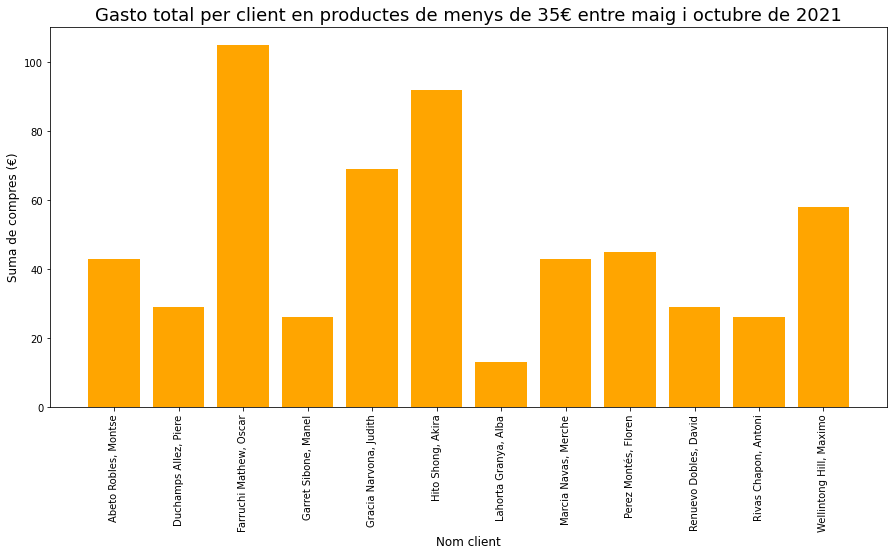

In [26]:
sql_select = '''SELECT cl.primercognom || ' ' || cl.segoncognom || ', ' || cl.nom as nomcomplet, SUM(pr.preu) AS sumacompres FROM clients AS cl
                INNER JOIN compres AS co ON cl.idclient = co.idclient
                INNER JOIN productes AS pr ON co.idproducte = pr.idproducte
                WHERE pr.preu <=35 and co.datavenda>='01/05/2021' and co.datavenda<='01/11/2021'
                GROUP BY nomcomplet
                ORDER BY nomcomplet;'''

cursor.execute(sql_select)
pgresult = cursor.fetchall()
plt.figure(figsize=(15,7))
df = pd.DataFrame(list(pgresult),columns=["nomcomplet","sumacompres"])
x = df.nomcomplet
y = df.sumacompres
plt.title("Gasto total per client en productes de menys de 35€ entre maig i octubre de 2021", fontsize="18")
plt.bar(x, y, align='center', color=['orange'])
plt.xticks(rotation=90)
plt.xlabel("Nom client", fontsize="12")
plt.ylabel("Suma de compres (€)", fontsize="12")


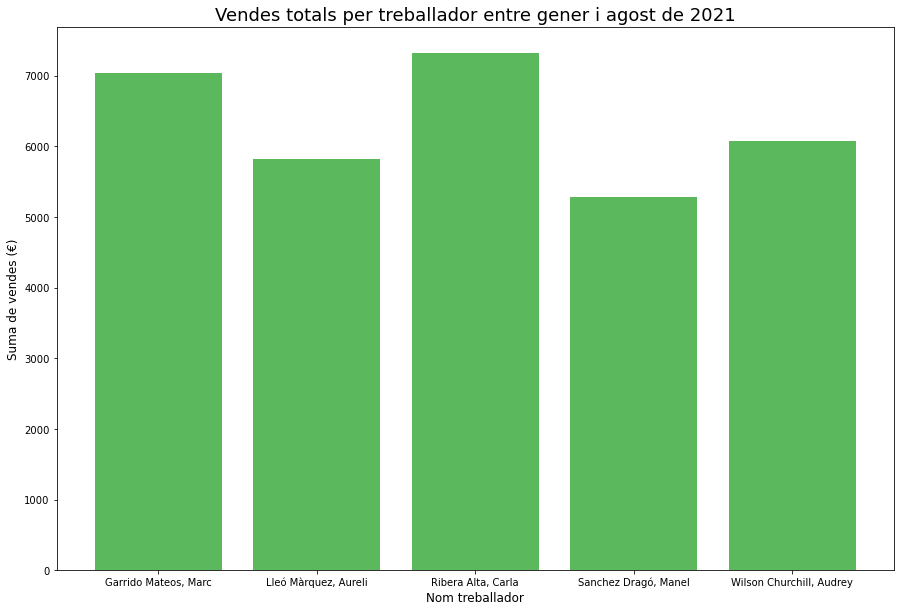

In [27]:
sql_select = '''SELECT tr.primercognom || ' ' || tr.segoncognom || ', ' || tr.nom AS nomcomplet, SUM(pr.preu) AS sumacompres FROM treballadors AS tr
                INNER JOIN compres AS co ON tr.idtreballador = co.idtreballador
                INNER JOIN productes AS pr ON co.idproducte = pr.idproducte
                INNER JOIN establiments AS es ON co.idestabliment = es.idestabliment
                WHERE co.datavenda>='01/01/2021' and co.datavenda<='01/09/2021'
                GROUP BY nomcomplet
                ORDER BY nomcomplet;'''

cursor.execute(sql_select)
pgresult = cursor.fetchall()
plt.figure(figsize=(15,10))
df = pd.DataFrame(list(pgresult),columns=["nomcomplet","sumacompres"])
x = df.nomcomplet
y = df.sumacompres

plt.title("Vendes totals per treballador entre gener i agost de 2021", fontsize="18")
plt.bar(x, y, align='center', color='#5cb85c')
plt.xticks(rotation=0)
plt.xlabel("Nom treballador", fontsize="12")
plt.ylabel("Suma de vendes (€)", fontsize="12")
cursor.close()